# Vamos aprender Deep Learning

In [1]:
%matplotlib inline
import pandas
import numpy
import matplotlib.pyplot as matplotlib
import seaborn
import string

from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score
from sklearn.model_selection import train_test_split

from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical

from sklearn.neural_network import MLPClassifier

In [2]:
# Vamos ler o csv de Linguagem de sinais ('../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')

Sinais = pandas.read_csv('../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
Sinais

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [3]:
# E agora vamos criar labels para cada letra

labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# ou também, da biblioteca string
labels = list(string.ascii_uppercase)
labels

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [4]:
# Agora, vamos ver o total número de imagens, pegar os x (ou seja, tirar o label) e transformar todas as linhas em matriz de 28x28c
num_images = len(Sinais.index)
imagens = numpy.array(Sinais.drop(['label'], axis=1))
imagens = imagens.reshape(num_images,28,28)

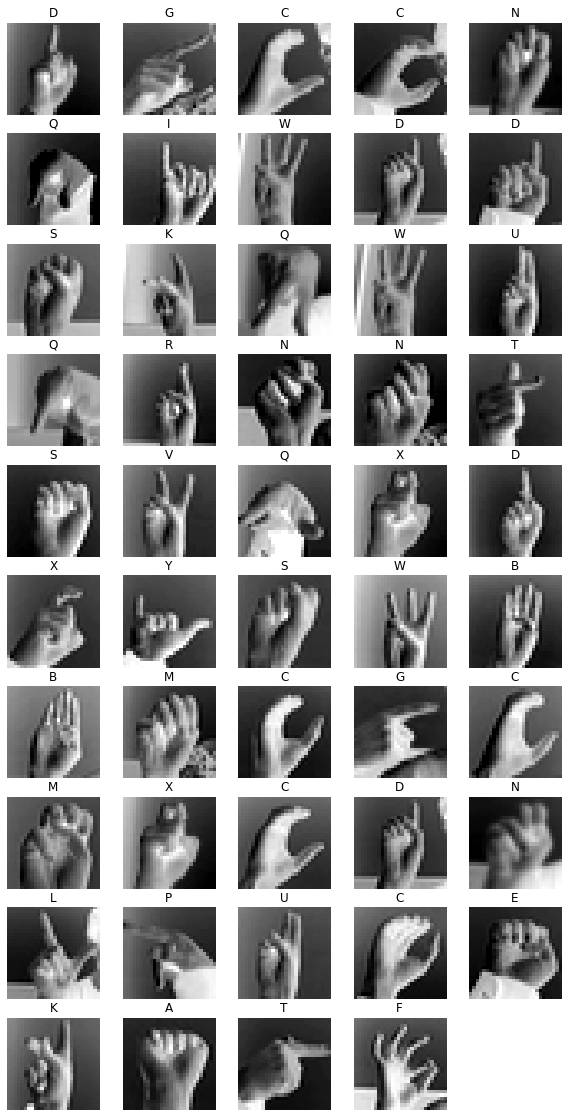

In [5]:
matplotlib.figure(figsize=(10,20))
for i in range(0,49) :
    matplotlib.subplot(10,5,i+1)
    matplotlib.axis('off')
    matplotlib.imshow(imagens[i], cmap="gray_r")
    matplotlib.title(labels[Sinais.label[i]])

In [6]:
# Pegar x e y, normalizar os valores de x de 0 e 255 para entre 0 e 1
y = Sinais['label']
x = Sinais.drop(['label'] , axis=1)
x = x/255

# Fazer o train test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [7]:
# Vamos começar utilizando o MLPClassifier (Multi-Layer Perceptron) do Sklearn
# Vamos criar um modelo perceptron com duas camadas de 200 e 60 neurônios

MLP = MLPClassifier(hidden_layer_sizes=(200,60))
MLP.fit(x_train,y_train)
predicted = MLP.predict(x_test)
print(accuracy_score(predicted, y_test))

1.0


In [8]:
# Vamos ver a matriz de confusão de A a Z

pandas.crosstab(y_test, predicted, rownames=['Reel'], colnames=['Prediction'], margins=True)

Prediction,0,1,2,3,4,5,6,7,8,10,...,16,17,18,19,20,21,22,23,24,All
Reel,,,,,,,,,,,,,,,,,,,,,
0,223,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,223
1,0,176,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,176
2,0,0,250,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,250
3,0,0,0,229,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,229
4,0,0,0,0,178,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,178
5,0,0,0,0,0,249,0,0,0,0,...,0,0,0,0,0,0,0,0,0,249
6,0,0,0,0,0,0,205,0,0,0,...,0,0,0,0,0,0,0,0,0,205
7,0,0,0,0,0,0,0,195,0,0,...,0,0,0,0,0,0,0,0,0,195
8,0,0,0,0,0,0,0,0,216,0,...,0,0,0,0,0,0,0,0,0,216


In [9]:
# Antes de montar nosso próprio modelo, precisamos pegar quantas classes temos no total.
# Você pode ver que a matriz anterior é 25x25, mas para ter certeza, vale a pena pegarmos y e contarmos.
from keras.utils.np_utils import to_categorical

print(y[0])
y_cat = to_categorical(y)
print(y_cat[0])
num_classes = y_cat.shape[1]
print(num_classes)

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
25


In [10]:
from keras.models import Sequential
from keras.layers import Dense

# Antes, o Keras exige que ao invés de dataset eles sejam numpy arrays. Vamos reseparar x e y e usar o numpy.array
x_train, x_test, y_train, y_test = train_test_split(x, y_cat, test_size=0.2, random_state=1)
x_train = numpy.array(x_train)
x_test = numpy.array(x_test)
y_train = numpy.array(y_train)
y_test = numpy.array(y_test)


# Primeiro, puxe o modelo sequencial (cujo os dados vão passar "em sequência", da forma tradicional)
# E vamos fazer duas camadas densas ReLU (Rectified Linear Unit) e uma última camada softmax que vai nos inidicar qual tipo de classe é


model = Sequential()
model.add(Dense(200, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [11]:
# E agora vamos compilar nosso modelo utilizando a métrica de accuracy e a perda como crossentropy (categorical = classes, crossentropy = "distância" entre elas)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# E agora, salvamos em treinamento o nosso fit de modelo, utilizando os x e y's que separamos. Vamos fazer 30 épocas e colocar a opção verbosa como 1
# Ele já fara o "predict" quando colocarmos validation_data
treinamento = model.fit(x_train , y_train , validation_data=(x_test,y_test), epochs=30, verbose=1)

Epoch 1/30
687/687 [==============================] - 3s 3ms/step - loss: 2.7011 - accuracy: 0.1922 - val_loss: 1.4417 - val_accuracy: 0.5402
Epoch 2/30
687/687 [==============================] - 2s 2ms/step - loss: 1.3751 - accuracy: 0.5672 - val_loss: 1.1917 - val_accuracy: 0.6057
Epoch 3/30
687/687 [==============================] - 2s 3ms/step - loss: 0.9645 - accuracy: 0.6928 - val_loss: 0.7305 - val_accuracy: 0.7742
Epoch 4/30
687/687 [==============================] - 2s 2ms/step - loss: 0.7343 - accuracy: 0.7650 - val_loss: 0.5754 - val_accuracy: 0.8162
Epoch 5/30
687/687 [==============================] - 2s 3ms/step - loss: 0.5750 - accuracy: 0.8171 - val_loss: 0.4246 - val_accuracy: 0.8681
Epoch 6/30
687/687 [==============================] - 2s 3ms/step - loss: 0.3993 - accuracy: 0.8768 - val_loss: 0.3253 - val_accuracy: 0.9026
Epoch 7/30
687/687 [==============================] - 2s 2ms/step - loss: 0.3164 - accuracy: 0.9010 - val_loss: 0.2578 - val_accuracy: 0.9233
Epoch 

In [12]:
# E agora, vamos avaliar
model.evaluate(x_test,y_test)

172/172 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000


[0.0026763894129544497, 1.0]

In [13]:
# A varíavel treinamento tem salva a accuracy e validação de cada treinamento

print(treinamento.history['accuracy'])
print(treinamento.history['val_accuracy'])

[0.32434892654418945, 0.6003004908561707, 0.7095702290534973, 0.7815971374511719, 0.8384174108505249, 0.8840830326080322, 0.9061191082000732, 0.9340739250183105, 0.9572937488555908, 0.9630303978919983, 0.9801037907600403, 0.9702695608139038, 0.9731833934783936, 0.991668164730072, 0.9770078063011169, 0.9873884320259094, 0.9820160269737244, 0.9909852743148804, 0.9813786149024963, 0.9936714768409729, 0.9774175882339478, 1.0, 0.9821526408195496, 0.9884811639785767, 1.0, 0.9822436571121216, 0.9761427640914917, 0.9998633861541748, 1.0, 0.9821981191635132]
[0.5401566028594971, 0.6057184338569641, 0.7741759419441223, 0.8162447810173035, 0.8681478500366211, 0.9025678634643555, 0.9233290553092957, 0.9255144596099854, 0.9551994204521179, 0.9633946418762207, 0.9531961679458618, 0.99071204662323, 0.9888908863067627, 0.9992715120315552, 0.9297031760215759, 0.9994536638259888, 0.9994536638259888, 0.9506465196609497, 1.0, 0.9996357560157776, 0.9996357560157776, 1.0, 0.8180659413337708, 0.9998179078102

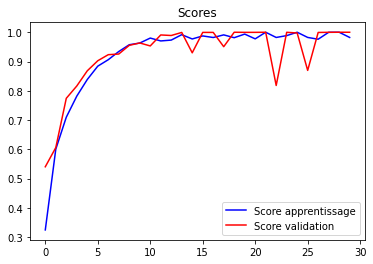

In [14]:
# E agora, vamos imprimir 
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    matplotlib.plot(epochs, accuracy, 'b', label='Score apprentissage')
    matplotlib.plot(epochs, val_accuracy, 'r', label='Score validation')
    matplotlib.title('Scores')
    matplotlib.legend()
    matplotlib.show()
plot_scores(treinamento)

E agora você pode repetir os passos para o FashionMNIST

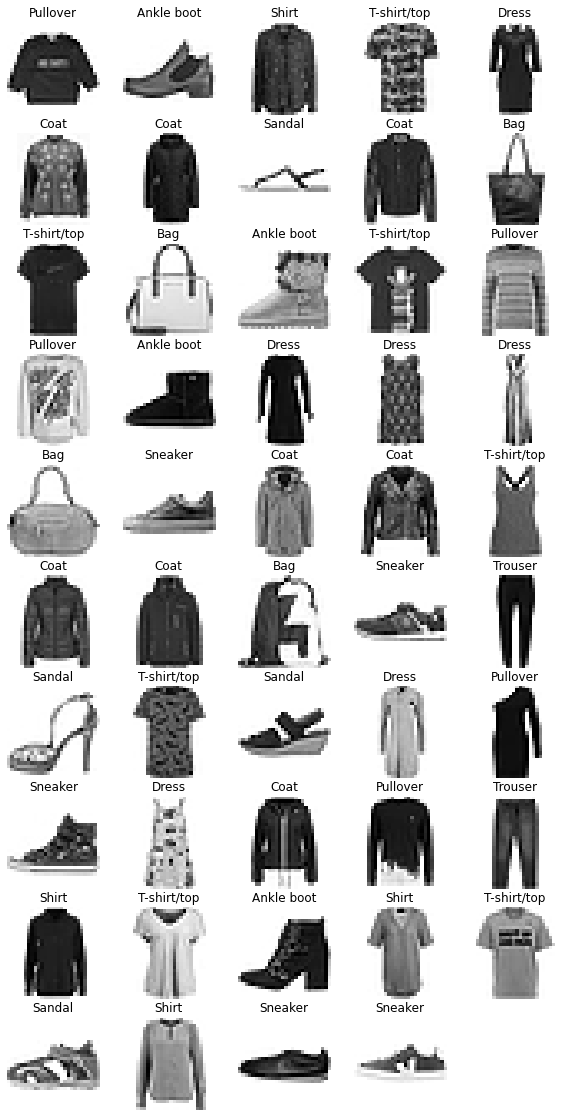

In [15]:
Roupas = pandas.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
num_images = len(Roupas.index)
imagens = numpy.array(Roupas.drop(['label'], axis=1))
imagens = imagens.reshape(num_images,28,28)
matplotlib.figure(figsize=(10,20))
for i in range(0,49) :
    matplotlib.subplot(10,5,i+1)
    matplotlib.axis('off')
    matplotlib.imshow(imagens[i], cmap="gray_r")
    matplotlib.title(labels[Roupas.label[i]])